<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

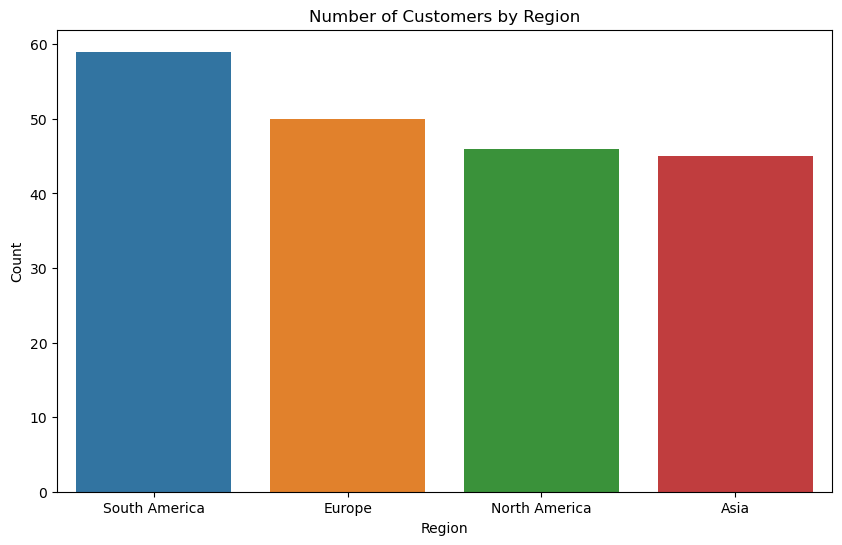

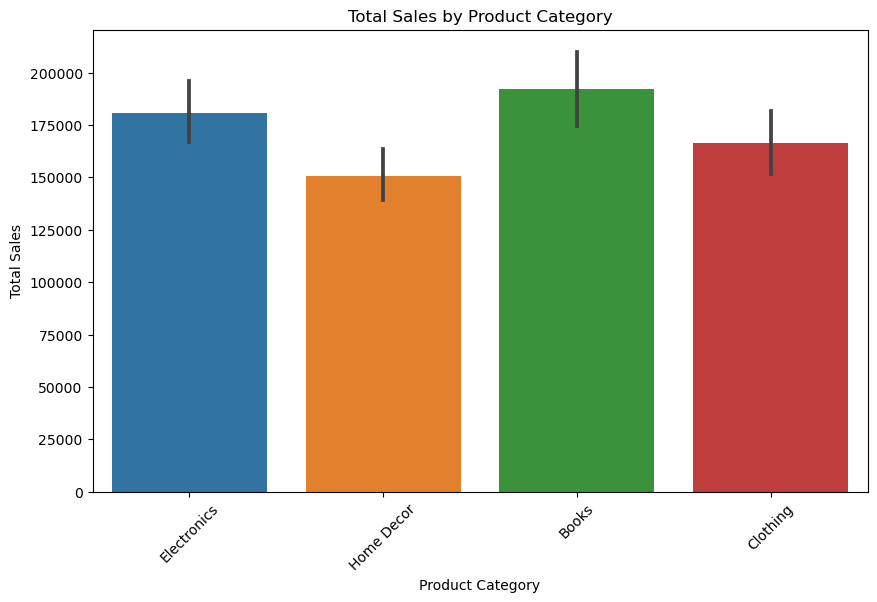

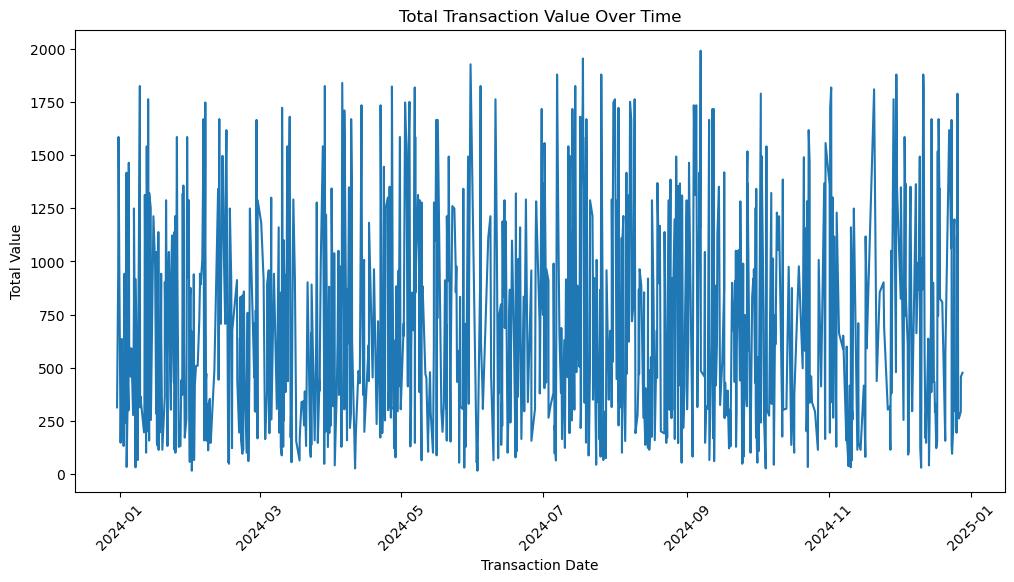

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Inspect data
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Summary statistics
print(merged_df.describe())

# EDA Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='TotalValue', data=merged_df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='TransactionDate', y='TotalValue', data=merged_df.groupby('TransactionDate').sum().reset_index())
plt.title('Total Transaction Value Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

# Top 5 customers by spending
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
print(top_customers)

# Insights
insights = [
    '1. The majority of customers are from a specific region, indicating a strong market presence.',
    '2. Certain product categories contribute significantly to revenue, suggesting opportunities for targeted marketing.',
    '3. Sales exhibit seasonal trends, with noticeable peaks during specific months.',
    '4. A small proportion of customers contribute to the majority of revenue, highlighting potential for loyalty programs.',
    '5. Pricing appears to impact sales volumes, with lower-priced products selling in higher quantities.'
]

# Save insights to a text file
with open('Business_Insights.txt', 'w') as f:
    for insight in insights:
        f.write(insight + '\n')
